In [1]:
import ndlib
import networkx as nx
import matplotlib.pyplot as plt
import ndlib.models.ModelConfig as mc
import ndlib.models.opinions as op
import json
import warnings
from ndlib.viz.mpl.OpinionEvolution import OpinionEvolution

no display found. Using non-interactive Agg backend
no display found. Using non-interactive Agg backend


### Modifiche apportate alla libreria ndlib:

#### Modifiche ai colori 

file <tt>Opinion Evolution.py </tt>
- <tt>64. if v < lim_inf:
    node2col[n] = '#4458DA'
  elif lim_inf <= v <= lim_sup:
    node2col[n] = '#91EDB6'
  else:
    node2col[n] = '#DA042F'</tt>
- <tt>80: plt.xlabel("Iterations", fontsize=14)
- <tt>81: plt.ylabel(self.ylabel, fontsize=14)
- <tt>82: plt.legend(loc="best", fontsize=12)


#### Modifiche al codice per opinioni reali

file <tt>AlgorithmicBiasModel.py </tt>
- <tt>54: def set_initial_status(self, graph, configuration=None):</tt>
- <tt>63: #self.status[node] = np.random.random_sample()</tt>
- <tt>64: self.status[node] = (graph.nodes[node]['classification']/6)+0.5</tt>
  
file <tt>OpinionEvolution.py </tt>
- <tt>64: if v < .33:
    node2col[n] = '#4458DA'
  elif .33 <= v <= .66:
    node2col[n] = '#91EDB6'
  else:
    node2col[n] = '#DA042F'</tt>
    

In [2]:
%run Utilyties.ipynb
%matplotlib inline

In [3]:
data = read_data('../data/final/data_complete.json')

G = init_network(data)

Alcune informazioni iniziali sui dati sono:
* TOT Retweet =  29863
* TOT Quote =  1187
* TOT Mentions =  57896
* TOT Reply =  3000




In [4]:
network_node_edge(G, 'G')

La rete G ha:

* Numero di nodi =  16675
* Numero di Edge =  52373


In [5]:
G0 = giant_component(G)

In [6]:
network_node_edge(G0, 'Giant component')

La rete Giant component ha:

* Numero di nodi =  16074
* Numero di Edge =  51932


Calcolo la frazione di infezione <b>reale</b>

In [7]:
counter = 0
for node in G0.nodes:
    if G.nodes[node]['classification']>0: 
        counter += 1
        
real = round(counter/G0.number_of_nodes(), 2)
        
print(f"Probabilità di infezione: {real}")

Probabilità di infezione: 0.34


Creo il <b>Complete Graph H</b> da 3000 nodi casuali della G0

In [8]:
import random as rd 

rd.seed(42)

sample = rd.sample(G0.nodes, 3000)
H = nx.complete_graph(sample)

#associo ad ogni nodo del Complete Graph la propria classificazione 
labels = nx.get_node_attributes(G0, 'classification') 
nx.set_node_attributes(H, labels, 'classification')

# Deffuant Model 

In [52]:
def deff_model (network, epsilon, gamma, iterations):
    model = op.AlgorithmicBiasModel(network)

    # Model configuration
    config = mc.Configuration()
    config.add_model_parameter("epsilon", epsilon)
    config.add_model_parameter("gamma", gamma)  
    model.set_initial_status(network, config)

    # Simulation execution
    iterations = model.iteration_bunch(iterations)

    plt.figure(figsize=(8,5))
    viz = OpinionEvolution(model, iterations)
    viz.plot()

## Prepocessing

In [53]:
#cambio il nome dei nodi per poterli passare a AlgorithmicBiasModel
mapping = dict(zip(G0, range(1, G0.number_of_nodes()+1)))
G0_l = nx.relabel_nodes(G0, mapping)

mapping = dict(zip(H, range(1, H.number_of_nodes()+1)))
H_l = nx.relabel_nodes(H, mapping)

## Crawled Data - Real Opinion

<b>W/O bias</b>:  
- con epsilon 0.65 e 1.3

### Gamma = 0

#### Epsilon = 0.325

100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [09:46<00:00,  2.34s/it]
No handles with labels found to put in legend.


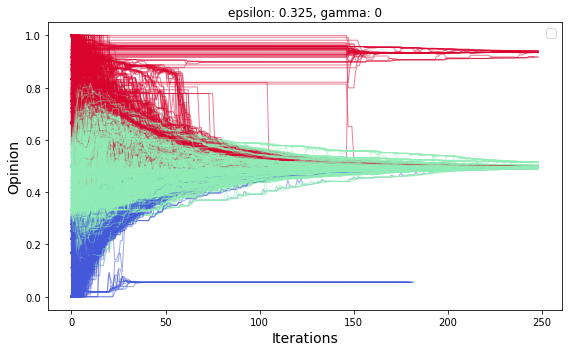

In [62]:
deff_model(G0_l, 
           epsilon = 0.325, 
           gamma = 0, 
           iterations = 250)

##### Epsilon = 0.65

100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [10:11<00:00,  2.45s/it]
No handles with labels found to put in legend.


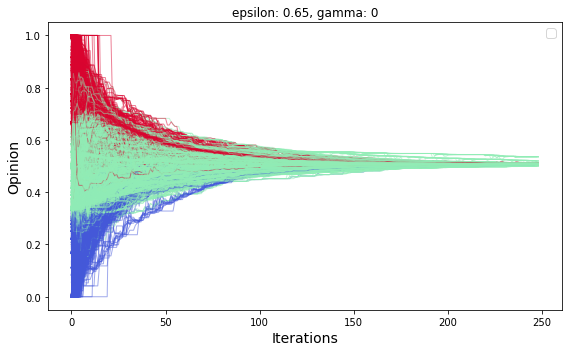

In [63]:
deff_model(G0_l, 
           epsilon = 0.65, 
           gamma = 0, 
           iterations = 250)

<b>With bias</b>:  
- Gamma 0,5 con epsilon 0.65 e 1.3
- Gamma 1 con epsilon 0.65 e 1.3
- Gamma 1,5 con epsilon 0.65 e 1.3
- Gamma 5 con epsilon 0.65 e 1.3

### Gamma = 0.5 

#### Epsilon = 0.325

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [41:27<00:00,  2.49s/it]
No handles with labels found to put in legend.


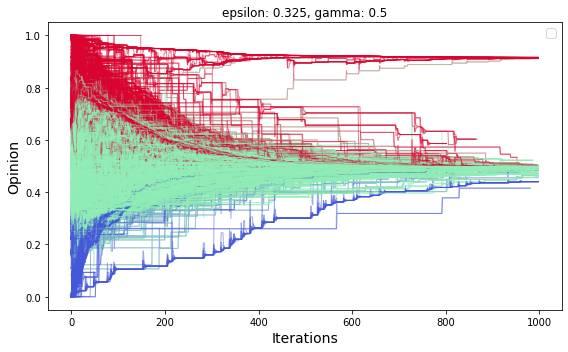

In [54]:
deff_model(G0_l, 
           epsilon = 0.325, 
           gamma = 0.5, 
           iterations = 1000)

##### Epsilon = 0.65

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [38:47<00:00,  2.33s/it]
No handles with labels found to put in legend.


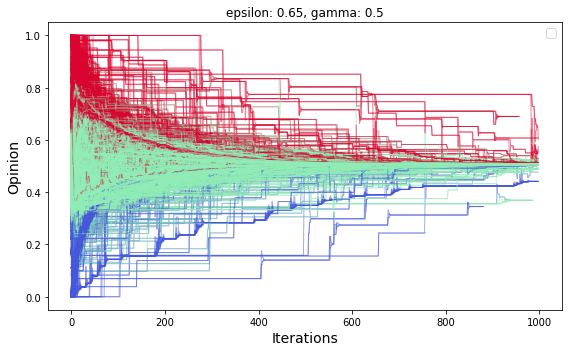

In [55]:
deff_model(G0_l, 
           epsilon = 0.65, 
           gamma = 0.5, 
           iterations = 1000)

### Gamma = 1

#### Epsilon = 0.325

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [40:19<00:00,  2.42s/it]
No handles with labels found to put in legend.


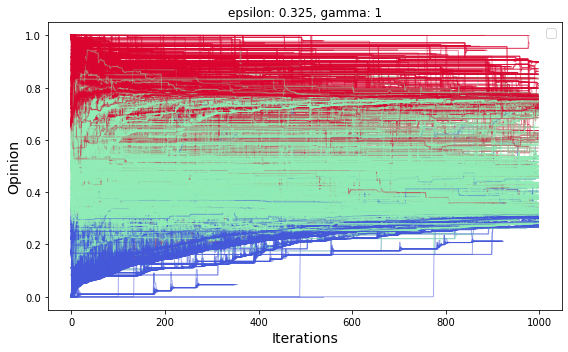

In [56]:
deff_model(G0_l, 
           epsilon = 0.325, 
           gamma = 1, 
           iterations = 1000)

##### Epsilon = 0.65

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [39:36<00:00,  2.38s/it]
No handles with labels found to put in legend.


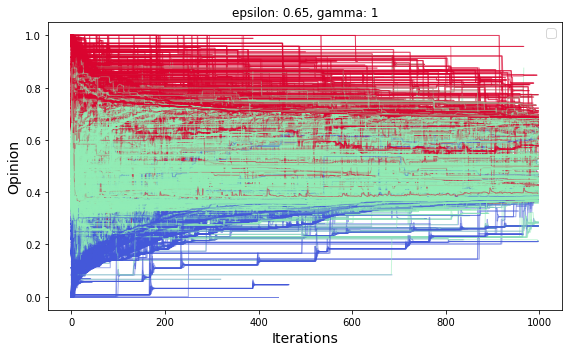

In [57]:
deff_model(G0_l, 
           epsilon = 0.65, 
           gamma = 1, 
           iterations = 1000)

### Gamma = 1.5 

#### Epsilon = 0.325

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [20:45<00:00,  2.49s/it]
No handles with labels found to put in legend.


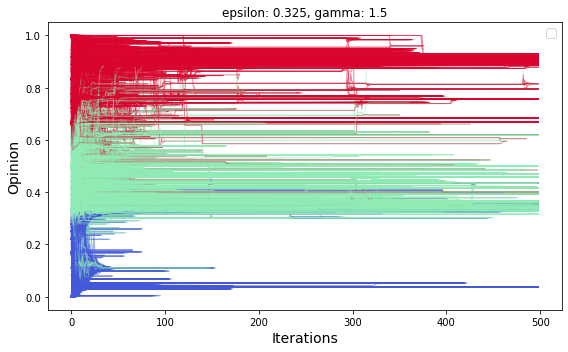

In [58]:
deff_model(G0_l, 
           epsilon = 0.325, 
           gamma = 1.5, 
           iterations = 500)

##### Epsilon = 0.65

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [20:07<00:00,  2.42s/it]
No handles with labels found to put in legend.


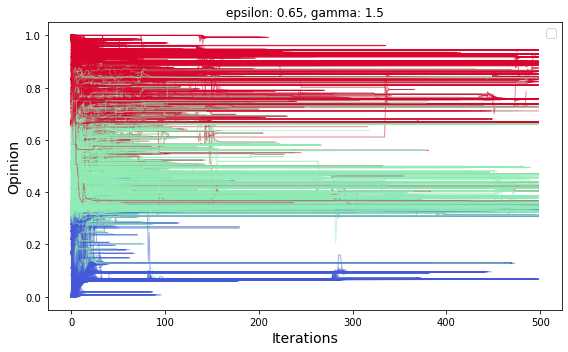

In [59]:
deff_model(G0_l, 
           epsilon = 0.65, 
           gamma = 1.5, 
           iterations = 500)

### Gamma = 5 

#### Epsilon = 0.325

100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [09:53<00:00,  2.37s/it]
No handles with labels found to put in legend.


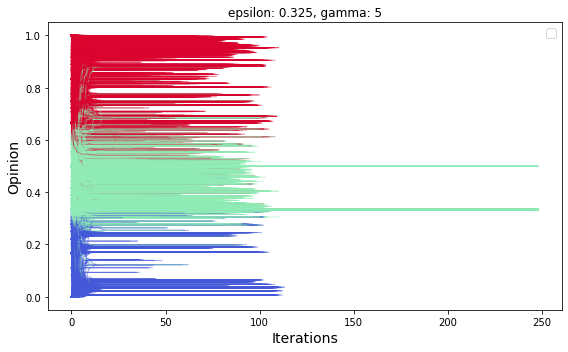

In [60]:
deff_model(G0_l, 
           epsilon = 0.325, 
           gamma = 5, 
           iterations = 250)

##### Epsilon = 0.65

100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [10:15<00:00,  2.46s/it]
No handles with labels found to put in legend.


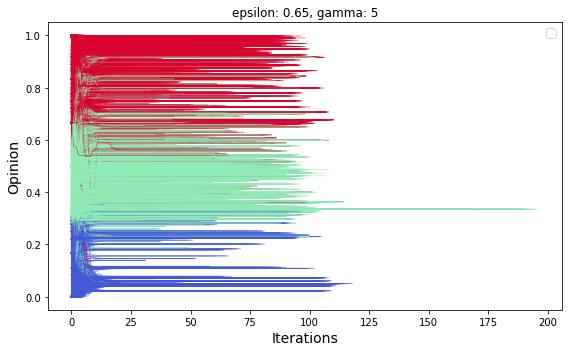

In [61]:
deff_model(G0_l, 
           epsilon = 0.65, 
           gamma = 5, 
           iterations = 250)

## Complete Graph - Real Opinion

<b>W/O bias</b>:  
- con epsilon 0.65 e 1.3

### Gamma = 0

#### Epsilon = .325

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [13:04<00:00, 31.39s/it]
No handles with labels found to put in legend.


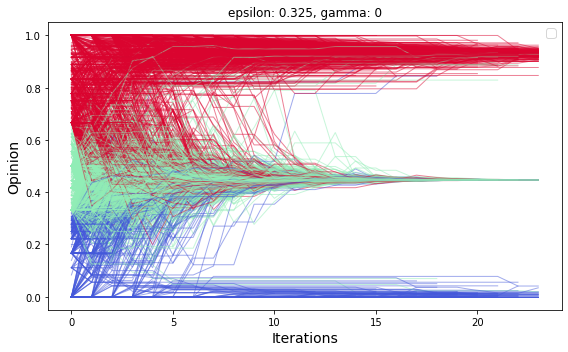

In [72]:
deff_model(H_l, 
           epsilon = .325, 
           gamma = 0, 
           iterations = 25)

##### Epsilon = 0.65

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [15:39<00:00, 37.56s/it]
No handles with labels found to put in legend.


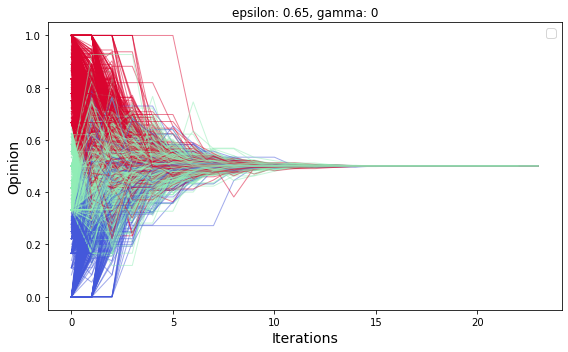

In [73]:
deff_model(H_l, 
           epsilon = 0.65, 
           gamma = 0, 
           iterations = 25)

# <b>With bias</b>:  
- Gamma 0,5 con epsilon 0.65 e 1.3
- Gamma 1 con epsilon 0.65 e 1.3
- Gamma 1,5 con epsilon 0.65 e 1.3
- Gamma 5 con epsilon 0.65 e 1.3

### Gamma = 0.5 

#### Epsilon = 0.325

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [09:44<00:00, 23.40s/it]
No handles with labels found to put in legend.


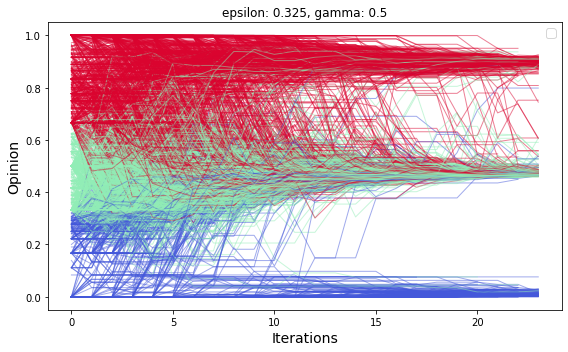

In [64]:
deff_model(H_l, 
           epsilon = 0.325, 
           gamma = 0.5, 
           iterations = 25)

##### Epsilon = 0.65

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [13:40<00:00, 32.80s/it]
No handles with labels found to put in legend.


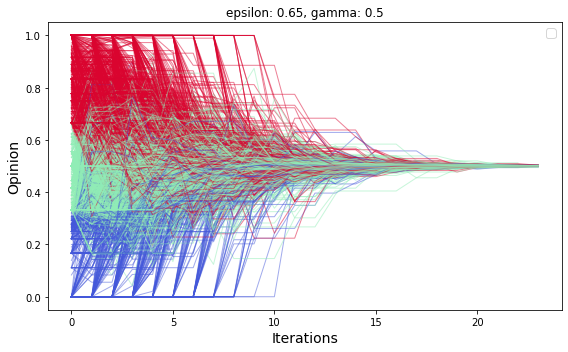

In [74]:
deff_model(H_l, 
           epsilon = 0.65, 
           gamma = 0.5, 
           iterations = 25) 

### Gamma = 1

#### Epsilon = 0.325

100%|██████████████████████████████████████████████████████████████████████████████| 200/200 [1:24:22<00:00, 25.31s/it]
No handles with labels found to put in legend.


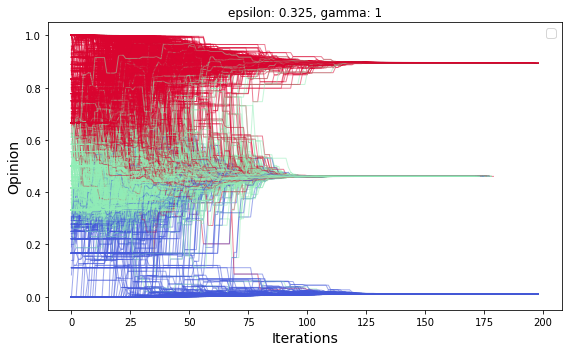

In [66]:
deff_model(H_l, 
           epsilon = 0.325, 
           gamma = 1, 
           iterations = 200)

##### Epsilon = 0.65

100%|██████████████████████████████████████████████████████████████████████████████| 200/200 [1:25:56<00:00, 25.78s/it]
No handles with labels found to put in legend.


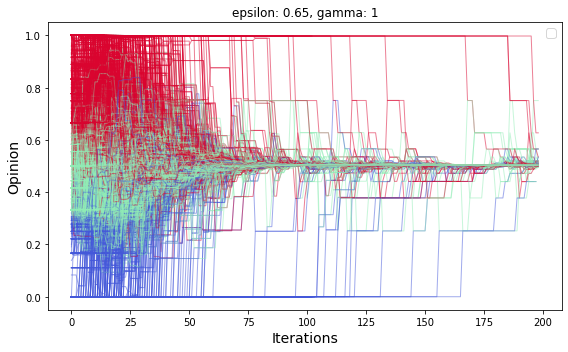

In [67]:
deff_model(H_l, 
           epsilon = 0.65, 
           gamma = 1, 
           iterations = 200)

### Gamma = 1.5 

#### Epsilon = 0.325

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [19:45<00:00, 23.72s/it]
No handles with labels found to put in legend.


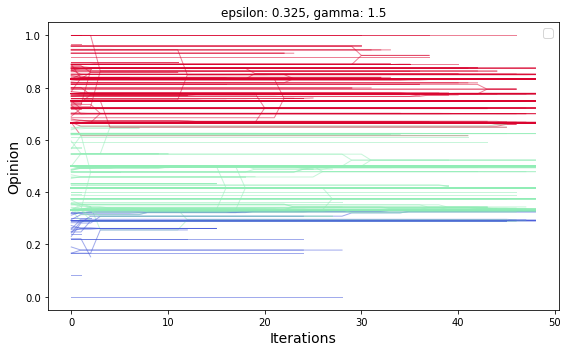

In [68]:
deff_model(H_l, 
           epsilon = 0.325, 
           gamma = 1.5, 
           iterations = 50)

##### Epsilon = 0.65

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [19:36<00:00, 23.53s/it]
No handles with labels found to put in legend.


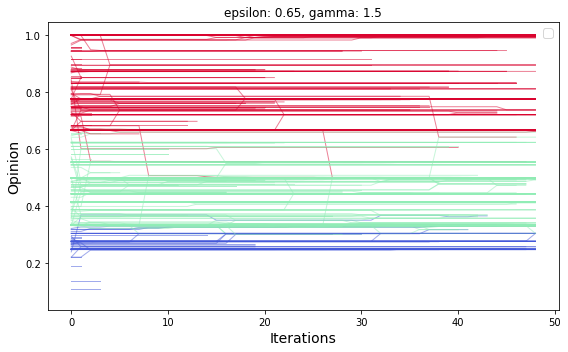

In [69]:
deff_model(H_l, 
           epsilon = 0.65, 
           gamma = 1.5, 
           iterations = 50)

### Gamma = 5 

#### Epsilon = 0.325

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [10:06<00:00, 24.27s/it]
No handles with labels found to put in legend.


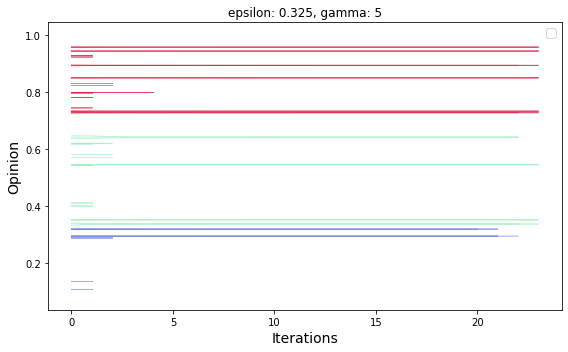

In [70]:
deff_model(H_l, 
           epsilon = .325, 
           gamma = 5, 
           iterations = 25)

##### Epsilon = 0.65

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [10:31<00:00, 25.26s/it]
No handles with labels found to put in legend.


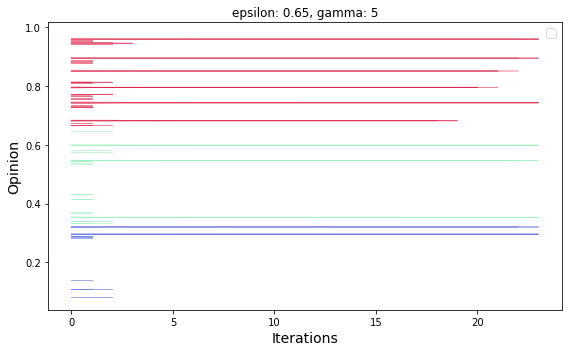

In [71]:
deff_model(H_l, 
           epsilon = 0.65, 
           gamma = 5, 
           iterations = 25)